#### On toymodules.
Compared to the sgan code, the toymodules dont have any type of pooling, i.e. the network does not know that agents are together in a scene. A very big __difference__ of __sgan__ and __toymodules__ to our __initial way to implement the modules__ is that the generator only __generates displacements__ and __loss is computed on displacements__.

#### Other remarks.
I renamed some variables for clarifying things:

- obs_taj -> xy_in
- obs_traj_rel -> dxdy_in
- pred_taj -> xy_out
- pred_traj_rel -> dxdy_out
- obs_len -> in_len
- pred_len -> out_len

Moreover, I commented some parts in sgan code and our code starting with "Important" and "Questions". In Pycharm you can go to Settings -> TODO and then create new keywords as TODO that will be highlighted in different colors. Thats super nice.

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import Solver, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,)

In [10]:
generator = ToyGenerator(in_len=8, out_len=12, noise_dim=(10,), decoder_h_dim=74)
discriminator = ToyDiscriminator()

In [11]:
solver = Solver(generator, discriminator,  # pls read the code and docstrings to get the idea
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': 1e-2}, 'discriminator': {'lr': 1e-2}})

In [12]:
solver.train(trainloader, epochs = 500, checkpoint_every=10, steps = {'generator': 1, 'discriminator': 1})

G_gan: 0.560	G_norm: 0.304	G_total: 0.865	D_real: 0.565	D_fake: 0.873	D_total: 1.438	
G_gan: 0.628	G_norm: 0.208	G_total: 0.835	D_real: 0.605	D_fake: 0.816	D_total: 1.421	
G_gan: 0.674	G_norm: 0.179	G_total: 0.853	D_real: 0.670	D_fake: 0.724	D_total: 1.394	
G_gan: 0.636	G_norm: 0.142	G_total: 0.779	D_real: 0.624	D_fake: 0.741	D_total: 1.365	
G_gan: 0.664	G_norm: 0.126	G_total: 0.790	D_real: 0.671	D_fake: 0.725	D_total: 1.396	
G_gan: 0.686	G_norm: 0.113	G_total: 0.799	D_real: 0.679	D_fake: 0.708	D_total: 1.387	
G_gan: 0.683	G_norm: 0.109	G_total: 0.793	D_real: 0.652	D_fake: 0.708	D_total: 1.360	
G_gan: 0.682	G_norm: 0.108	G_total: 0.789	D_real: 0.655	D_fake: 0.722	D_total: 1.377	
G_gan: 0.691	G_norm: 0.162	G_total: 0.853	D_real: 0.615	D_fake: 0.706	D_total: 1.322	
G_gan: 0.671	G_norm: 0.122	G_total: 0.793	D_real: 0.663	D_fake: 0.732	D_total: 1.395	
G_gan: 0.672	G_norm: 0.106	G_total: 0.778	D_real: 0.651	D_fake: 0.717	D_total: 1.368	
G_gan: 0.688	G_norm: 0.120	G_total: 0.808	D_real: 0.65

In [19]:
torch.save??

In [20]:
torch.save(solver.generator.state_dict(), 'generator_noise')

### Visualize things.
As we talked about, I implemented a simple plotting class that is supposed to integrate with the rest. E.g. vis.loss takes the dictionary 'solver.train_loss_history' of the solver object to plot all losses.
- For everything that you would like to visualize, think about how we could implement it in the class Visualization.

#### Losses

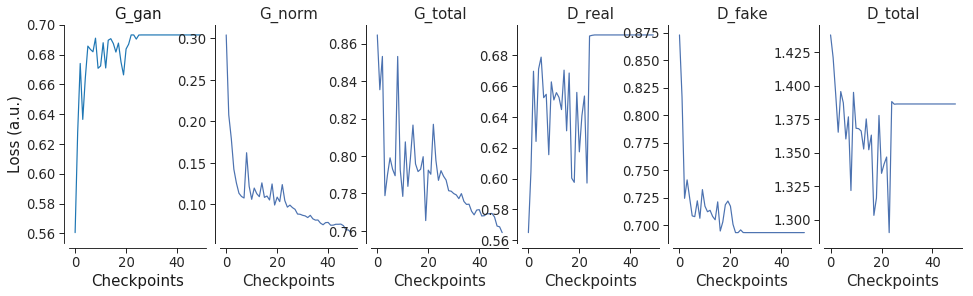

In [13]:
vis = Visualization()
vis.loss(solver.train_loss_history)

#### Trajectories

In [14]:
# get trajectories, dimensions are (scenes, sequence (in and pred), seq_len, num_agents, coordinates)
output = solver.test(trainloader)

In [15]:
ymin = np.min([np.min(seq[:, :, 1]) for scene in output for seq in scene])
ymax = np.max([np.max(seq[:, :, 1]) for scene in output for seq in scene])
xmin = np.min([np.min(seq[:, :, 0]) for scene in output for seq in scene])
xmax = np.max([np.max(seq[:, :, 0]) for scene in output for seq in scene])
plt.plot(output[0][0][:, 1, 0], output[0][0][:, 1, 1])
plt.plot(output[0][1][:, 1, 0], output[0][1][:, 1, 1])
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

TypeError: string indices must be integers

#### other

In [34]:
# get gt vs pred, dimensions are (scenes, sequence (out and pred), seq_len, num_agents, coordinates)
output = solver.test(trainloader, return_gt = True)

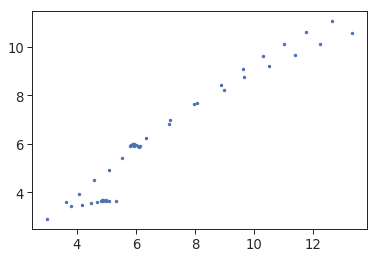

In [35]:
plt.plot(output[0][0].flatten(), output[0][1].flatten(), '.')